In [49]:
import json
with open('data/json/makeup.json', 'r') as f:
    makeup = json.load(f)



import re
def merge_push_content_by_userid(messages):
    result = {}
    for message in messages:
        userid = message["push_userid"]
        content = message["push_content"]
        if userid in result:
            result[userid].append(content)
        else:
            result[userid] = [content]
    output = []
    for k,v in result.items():
        output.append(v)
    return output

def is_review_post(post_title):
    # Check if the title starts with "[心得]"
    return post_title.startswith("[心得]")

def find_elements_in_string(input_string, elements_list):
    # Convert the string to lower case to make the search case-insensitive
    input_string = input_string.lower()

    # Initialize an empty list to store the elements found in the string
    found_elements = []

    # Iterate through each element in the elements list
    for element in elements_list:
        # Check if the element is present in the string
        if element.lower() in input_string:
            # If present, add the element to the found_elements list
            found_elements.append(element)

    # Return the list of found elements
    return found_elements

def remove_punctuation(input_string):
    # Define a regular expression pattern to match all punctuation marks
    pattern = r'[^\w\s]'
    # Use re.sub to replace all punctuation marks with an empty string
    cleaned_string = re.sub(pattern, '', input_string)
    return cleaned_string


def replace_links_as_img(text):
    url_pattern = r'https?://\S+|www\.\S+'
    # Replace all links matching the pattern with the string "<image>"
    replaced_text = re.sub(url_pattern, '<image>', text)
    return replaced_text
# Step 2: Transformation
posts = []

# Filter out posts that are not article_title
makeup = [m for m in makeup if m['article_title']  and m['article_title'] != '' ]
makeup = [m for m in makeup if m['article_title'].startswith('[心得]')]  # 只取心得文章
for i,_ in enumerate(makeup):

    post ={}
    post['title'] = _['article_title']
    post['content'] = replace_links_as_img(_['content'])

    posts.append(post)

    


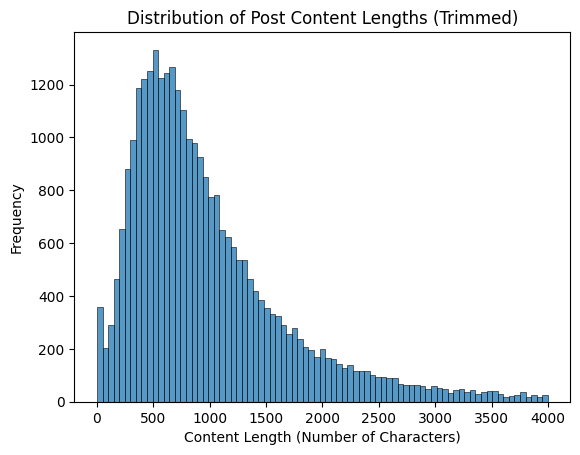

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_trimmed_content_length_distribution(posts, trim_threshold=None):
    # 計算每篇文章的字數長度
    content_lengths = [len(post['content']) for post in posts]
    
    # 如果指定了 trim_threshold，則只保留小於此閾值的數據
    if trim_threshold:
        content_lengths = [length for length in content_lengths if length <= trim_threshold]
    
    # 創建 seaborn 直方圖
    sns.histplot(content_lengths, kde=False)
    
    # 設置 X 軸和 Y 軸標籤以及圖表標題
    plt.xlabel('Content Length (Number of Characters)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Post Content Lengths (Trimmed)')
    
    # 顯示圖表
    plt.show()

# 使用範例：
# 這裡的 trim_threshold 是一個指定的字數長度閾值，只顯示小於該長度的內容
plot_trimmed_content_length_distribution(posts, trim_threshold=4000)


In [51]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [52]:
import pandas as pd
post_df = pd.DataFrame(posts)


In [56]:
# Calculate content lengths and add as a new column to the DataFrame
post_df['content_length'] = post_df['content'].apply(len)

# Select rows where content_length is less than 400
filtered_post_df = post_df[post_df['content_length'] < 400]

filtered_post_df =filtered_post_df.head(5000)
filtered_post_df

,title,content,content_length
6,[心得] integrate超水潤無瑕粉底精華沒讓我失望!,有圖有文有素顏好讀版 <image> 雖然cat大有分享照片了 我還是想來推一下持久度XD ...,100
12,[心得] 萊雅氣墊唇筆-酒紅色的微醺,是這樣的 在fb上看了小s的唇妝覺得唇醺的非常美 如下 <image> <image> 然後...,262
17,[心得] nars裸光奇肌粉餅+惹火唇膏!很滿意!!!,靠櫃買了版上評價還不錯的裸光奇肌粉餅 實際用在我臉上分享一下 <image> 很遮毛孔阿沒有...,138
30,[心得] 過年就要紅吱吱唇膏分享,每次回鄉過年都會特別帶比較紅的唇膏回去 土土色系長輩們都不懂( ) 分享我手邊紅得很美的顏色...,384
39,[心得] 歐美專櫃質感 essence曼谷盤,<image> 近期用到最喜歡的開架眼影盤 essence 悠活曼谷經典眼彩盤 <image...,386
...,...,...,...
29052,[心得] too cool for school布丁BB霜使用報告,前陣子到韓國買了好多底妝品這次先跟大家分享一款 之後還會有其他彩妝品的使用報告喔 好讀圖文網...,56
29054,[心得] [Face] 幫你遮光光！心機MAQuillAGE長效立體光粉霜(粉條),再不寫這篇2011春夏新底妝都要出了 (雖然似乎已經有形象照出來了...) (不過還是可以當...,106
29055,[心得] 超神奇的大創粉撲清潔液,網誌好讀版： <image> 這個產品在版上已經燒很久了~也有點小過時了(汗... 可是我上...,270
29072,[心得] NARS特霧唇膏Mascate●紅唇●confess,之前跟大家分享了一篇紅唇的文 ([妝容] NARS特霧唇膏Mascate冽豔紅唇 <imag...,297


In [57]:
instruction_template = '''你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用"～" ,"！！","><""(表達開心),"啦","XD"(表達開心)  來當語氣助詞'''

input_template = '''生成一篇有關MakeUp看板心得貼文

標題: {{title}}

生成的貼文長度約: {{content_length}}字

說明:
輕鬆親切：請用輕鬆親切的語氣來描述產品，像是在和朋友分享心得。
指示: "用一個輕鬆親切的語氣來撰寫心得，就像在和朋友聊天一樣。"
誠懇真實：請強調真實使用感受，避免過度誇張，讓讀者感覺到誠懇。
指示: "用誠懇真實的語氣，真誠地描述產品的優點和缺點。"
幽默風趣：適度加入一些幽默或有趣的比喻，使文章更具吸引力。
指示: "在撰寫時加入一些幽默風趣的元素，讓讀者感覺輕鬆愉快

跳過轉折詞彙，直接描述即可。
跳過叫使用者行動的字，直接描述即可。

1. 產品介紹
2. 化妝過程：應用氣墊後的妝前妝後對比，效果評價，妝感呈現。
3. 持久度測試：實際使用狀況，遇到汗水、飲食、擦臉等情況後的狀況。
4. 總結評價：整體表現評分、等總體印象。
5. 建議用途：推薦在何種情況下使用
6. 個人心得：作者的真實試用感受，以及對產品的總體滿意度和未來使用打算。'''

train_data = filtered_post_df
train_data['title'] = train_data['title'].apply(lambda x: x.replace('[心得]',''))
train_data['title'] = train_data['title'].apply(lambda x: x.strip())
train_data.rename(columns={'content':'output'}, inplace=True)
train_data['instruction'] = instruction_template
train_data['input'] = input_template
train_data['input'] = train_data['title'].apply(lambda title: input_template.replace('{{title}}', title))
train_data['input'] = train_data.apply(lambda x: x['input'].replace('{{content_length}}', str(x['content_length'])), axis=1)

train_data = train_data[['input', 'output', 'instruction']]
train_data

,input,output,instruction
6,生成一篇有關MakeUp看板心得貼文\n\n標題: integrate超水潤無瑕粉底精華沒讓...,有圖有文有素顏好讀版 <image> 雖然cat大有分享照片了 我還是想來推一下持久度XD ...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
12,生成一篇有關MakeUp看板心得貼文\n\n標題: 萊雅氣墊唇筆-酒紅色的微醺\n\n生成的...,是這樣的 在fb上看了小s的唇妝覺得唇醺的非常美 如下 <image> <image> 然後...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
17,生成一篇有關MakeUp看板心得貼文\n\n標題: nars裸光奇肌粉餅+惹火唇膏!很滿意!...,靠櫃買了版上評價還不錯的裸光奇肌粉餅 實際用在我臉上分享一下 <image> 很遮毛孔阿沒有...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
30,生成一篇有關MakeUp看板心得貼文\n\n標題: 過年就要紅吱吱唇膏分享\n\n生成的貼文...,每次回鄉過年都會特別帶比較紅的唇膏回去 土土色系長輩們都不懂( ) 分享我手邊紅得很美的顏色...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
39,生成一篇有關MakeUp看板心得貼文\n\n標題: 歐美專櫃質感 essence曼谷盤\n\...,<image> 近期用到最喜歡的開架眼影盤 essence 悠活曼谷經典眼彩盤 <image...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
...,...,...,...
29052,生成一篇有關MakeUp看板心得貼文\n\n標題: too cool for school布...,前陣子到韓國買了好多底妝品這次先跟大家分享一款 之後還會有其他彩妝品的使用報告喔 好讀圖文網...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
29054,生成一篇有關MakeUp看板心得貼文\n\n標題: [Face] 幫你遮光光！心機MAQui...,再不寫這篇2011春夏新底妝都要出了 (雖然似乎已經有形象照出來了...) (不過還是可以當...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
29055,生成一篇有關MakeUp看板心得貼文\n\n標題: 超神奇的大創粉撲清潔液\n\n生成的貼文...,網誌好讀版： <image> 這個產品在版上已經燒很久了~也有點小過時了(汗... 可是我上...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."
29072,生成一篇有關MakeUp看板心得貼文\n\n標題: NARS特霧唇膏Mascate●紅唇●c...,之前跟大家分享了一篇紅唇的文 ([妝容] NARS特霧唇膏Mascate冽豔紅唇 <imag...,"你是一個reddit 討論區的使用者, 在看板MakeUp看表心得貼文, 你愛用""～"" ,""..."


In [58]:

train_data.to_csv('data/csv/makeup_fine_turn_data.csv', index=False)